# Exporting Micromodel to VTK File
---
This notebook will show how to export a 2D image (in this case, a generated micromodel) to a VTK file for PFLOTRAN simulations or for visualizations in Paraview. We will use the ```io.img2vtk``` function of Pore2Chip.

In [3]:
from pore2chip import filter_im, io
from matplotlib import pyplot as plt
import numpy as np
import os

path = os.getcwd()

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the Image (Micromodel from Example 2)
---

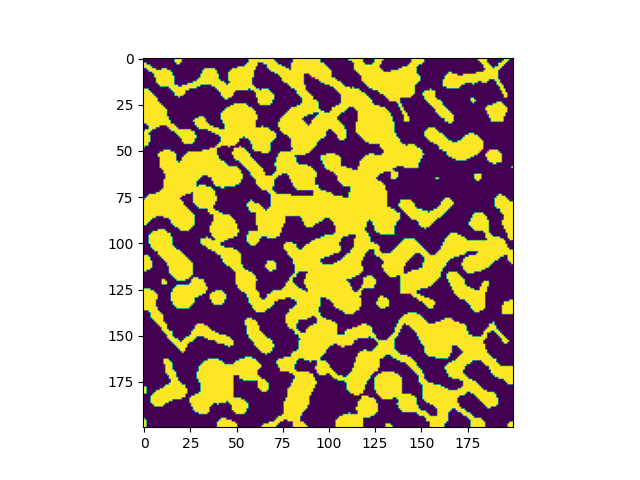

In [4]:
model_path = os.path.dirname(path) + r'\example_outputs\\network1.png'
micromodel_filtered = filter_im.read_and_filter(model_path, invert=True)
fig, ax = plt.subplots()
ax.imshow(micromodel_filtered)

## Export to VTK
---
The cell below exports the 2D image to a VTK file. The first parameter of ```io.img2vtk``` is the ndarray of the image. The second parameter is the file destination and name. The third parameter is a size 3 one-dimensional array-like that describes the 3D dimensions of the VTK object in microns, with x, y, and z lengths respectively.

In this example, the VTK file is 1200 x 1200 x 40 microns.

In [20]:
io.img2vtk(micromodel_filtered, 'example_outputs/test_file', [1200, 1200, 40])

Finished writing to: example_outputs/test_file.vtk


This function also accepts optional ```**kwargs``` for writing other pixel data such as permeability or conductivity. The cell below writes a constant resistivity parameter and conductance parameter for all the pixels.

In [21]:
num_elements = (1200 - 1) * (1200 - 1) * (40 - 1)
resist_list = np.ndarray(shape = (num_elements,1), dtype = float)
conduct_list = np.ndarray(shape = (num_elements,1), dtype = float)

for k in range(0,40-1):
    for j in range(0,1200-1):
        for i in range(0,1200-1):
            elem_index = i + j*(1200-1) + k*(1200-1)*(1200-1) 
            resist_list[elem_index,0]  = 350 # resistance ohm-m
            conduct_list[elem_index,0] = 1.0/350 # conductance S-m^-1

io.img2vtk(micromodel_filtered, 'example_outputs/test_file', [1200, 1200, 40], 
            Resistivity=resist_list,
            Conductivity=conduct_list)

Writing Resistivity...
Writing Conductivity...
Finished writing to: example_outputs/test_file.vtk
